(720, 1280, 3)
<class 'numpy.ndarray'>
Shape of the image (720, 1280)


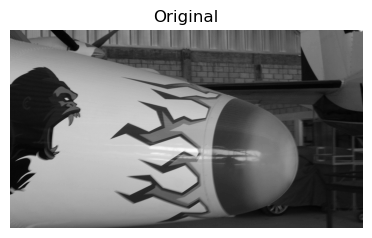

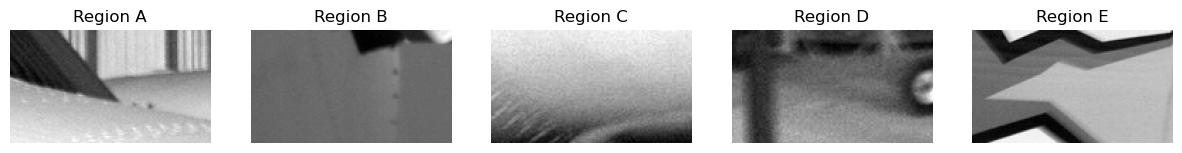

In [3]:
# Importamos las librerias necesarias
import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Cargamos imagen, se convierte a matriz
image = imread('../intensidad/C0223T01.JPG')

# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

# Convertimos la imagen a escala de grises
image = rgb2gray(image)

print(type(image))

# Shape of the image
print("Shape of the image", image.shape)

# Dimensiones de cada subdivisión
rows, cols = image.shape
sub_height = rows // 9
sub_width = cols // 9

# Regiones A, B, C, D y E
region_A = image[0:sub_height, 0:sub_width]  # Esquina superior izquierda
region_B = image[0:sub_height, -sub_width:]  # Esquina superior derecha
region_C = image[-sub_height:, 0:sub_width]  # Esquina inferior izquierda
region_D = image[-sub_height:, -sub_width:]  # Esquina inferior derecha
region_E = image[4*sub_height:5*sub_height, 4*sub_width:5*sub_width]  # Centro

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Mostrar las regiones A, B, C, D y E
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.title('Region A')
plt.imshow(region_A, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Region B')
plt.imshow(region_B, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Region C')
plt.imshow(region_C, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Region D')
plt.imshow(region_D, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('Region E')
plt.imshow(region_E, cmap='gray')
plt.axis('off')

plt.show()


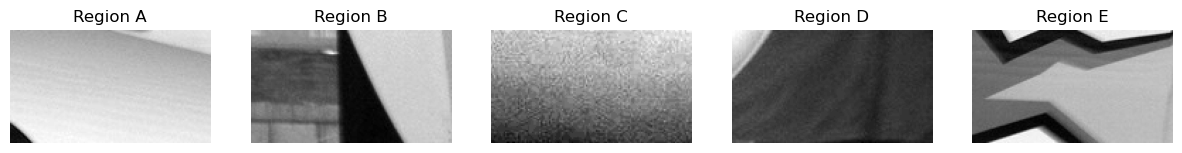

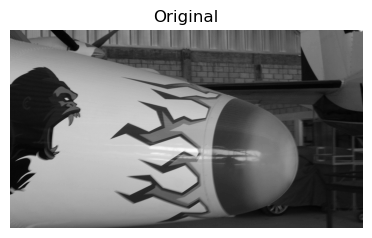

In [4]:
# Dimensiones de la imagen
rows, cols = image.shape

# Dimensiones de cada una de las 9 regiones principales (3x3)
region_height = rows // 3
region_width = cols // 3

# Función para obtener la subdivisión central de una región dada
def get_central_subdivision(region):
    sub_height = region.shape[0] // 3
    sub_width = region.shape[1] // 3
    return region[sub_height:2*sub_height, sub_width:2*sub_width]

# Extraemos las 9 regiones principales
region_1 = image[0:region_height, 0:region_width]
region_2 = image[0:region_height, region_width:2*region_width]
region_3 = image[0:region_height, 2*region_width:cols]
region_4 = image[region_height:2*region_height, 0:region_width]
region_5 = image[region_height:2*region_height, region_width:2*region_width]
region_6 = image[region_height:2*region_height, 2*region_width:cols]
region_7 = image[2*region_height:rows, 0:region_width]
region_8 = image[2*region_height:rows, region_width:2*region_width]
region_9 = image[2*region_height:rows, 2*region_width:cols]

# Obtenemos las subdivisiones centrales de las esquinas y la central de la región central
region_A = get_central_subdivision(region_1)
region_B = get_central_subdivision(region_3)
region_C = get_central_subdivision(region_7)
region_D = get_central_subdivision(region_9)
region_E = get_central_subdivision(region_5)

# Mostrar las regiones A, B, C, D y E
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.title('Region A')
plt.imshow(region_A, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Region B')
plt.imshow(region_B, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Region C')
plt.imshow(region_C, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Region D')
plt.imshow(region_D, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('Region E')
plt.imshow(region_E, cmap='gray')
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()
